In [30]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [31]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    base_price += learning_rate * (price - predicted_price)
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    return price_per_room, base_price
    

In [32]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    # if price - predicted_price is positive
    # then price_per_room a.k.a. the slope should be adjusted upwards by a little bit
    # also adjust base_price a.k.a. bias upwards
    if price > predicted_price:
        price_per_room += learning_rate * num_rooms
        base_price += learning_rate
    # if price - predicted_price is negative
    # adjust price_per_room and base_price downwards
    else:
        price_per_room -= learning_rate * num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [33]:
import random
import numpy as np

np.set_printoptions(precision=3)

# Capture the changes in price_per_room
# and base_price in a list
price_per_room_base_price_list = []
root_mean_square_errors = []

def linear_regression(features, labels, learning_rate=0.01, epochs=100):
    def rmse(labels, predictions):
        n = len(labels)
        differences = np.subtract(labels, predictions)
        return np.sqrt(1.0 / n * (np.dot(differences, differences)))
    
    price_per_room = random.random()
    base_price = random.random()
    predictions = [0.0] * len(labels)
    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        
        predicted_price = base_price + price_per_room * num_rooms
        predictions[i] = predicted_price

        root_mean_square_errors.append(rmse(labels, predictions))

        base_price += learning_rate * (price - predicted_price)
        price_per_room += learning_rate * num_rooms * (price - predicted_price)
        price_per_room_base_price_list.append([price_per_room, base_price])

    return price_per_room, base_price

In [34]:
import numpy as np
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

In [35]:
final_price_per_room, final_base_price = linear_regression(features, labels, learning_rate = 0.01, epochs=10000)

print(f'Final price {final_price_per_room:.2f} and Final base price {final_base_price:.2f}')
final_formula = lambda num_of_rooms : num_of_rooms * final_price_per_room + final_base_price
print(f'Apartments with 4 rooms approximately cost {final_formula(4):.2f}')

Final price 49.92 and Final base price 99.50
Apartments with 4 rooms approximately cost 299.17


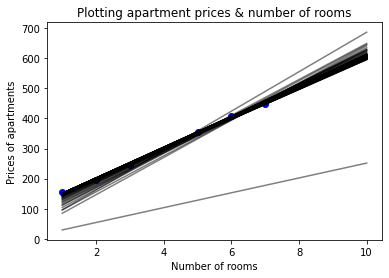

In [36]:
import matplotlib.pyplot as plt

# Plotting the prices of the apartments
plt.title("Plotting apartment prices & number of rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Prices of apartments")
plt.scatter(features, labels, color = "blue")

index = 0
for price_per_room_and_base_price in price_per_room_base_price_list:
    price_per_room = price_per_room_and_base_price[0]
    base_price = price_per_room_and_base_price[1]
    m = price_per_room # slope
    b = base_price # y-intercept

    y = lambda x : m * x + b # linear function
    x = np.linspace(1, 10) # set of x values

    if index % 50 == 0:
        plt.plot(x, y(x), color = "black", alpha = 0.5)
    index += 1

plt.show()

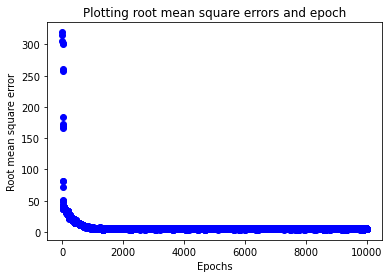

In [37]:
plt.title("Plotting root mean square errors and epoch")
plt.xlabel("Epochs")
plt.ylabel("Root mean square error")
epochs = range(10000)
plt.scatter(epochs, root_mean_square_errors, color = "blue")

In [38]:
import turicreate as tc

data = tc.SFrame('Hyderabad.csv')
model = tc.linear_regression.create(data, target='Price')

Finished parsing file /home/ubuntu/grokkingmachinelearning/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.013873 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ubuntu/grokkingmachinelearning/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.008232 secs.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 280

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.021757     | 140629224.981307   | 12638602.867359      | 4273649.943905                  | 2905077.499704                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [39]:
house = tc.SFrame({'Area' : [1000], 'No. of Bedrooms': [3]})
model.predict(house)

dtype: float
Rows: 1
[2651105.693435888]

In [40]:
simple_model = tc.linear_regression.create(data, features=['Area'],  target='Price')
simple_model.coefficients

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002699     | 144294632.223736   | 23523917.167745      | 4969793.164834                  | 3420971.950011                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,-6301645.489069618,244751.20889583402
Area,None,9820.73209648485,135.30469477657545


In [145]:
housesize = np.array([100, 200, 200, 250, 325])
houseprices = np.array([200, 475, 400, 520, 735])

def square_trick(learning_rate, weight, feature, bias, label):
    prediction = weight * feature + bias
    bias += learning_rate * (label - prediction)
    weight += learning_rate * feature * (label - prediction)
    return weight, bias

def absolute_trick(learning_rate, weight, feature, bias, label):
    prediction = weight * feature + bias
    if label > prediction:
        bias += learning_rate
        weight += learning_rate * feature
    else:
        bias -= learning_rate
        weight -= learning_rate * feature
    return weight, bias

def my_linear_regression(features, labels, learning_rate=0.001, epochs=10000, weight=random.random(), bias=random.random(), learning_method=square_trick):

    def rmse(actual, predictions):
        differences = np.subtract(actual, predictions)
        return np.sqrt(np.mean(np.dot(differences, differences)))
    
    def mae(actual, predictions):
        differences = np.subtract(actual, predictions)
        return np.mean(np.abs(differences))

    def create_predictions(features, weight, bias):
        return np.add(np.multiply(weight, features), bias)

    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        random_label_from_input = labels[i]
        random_feature_from_input = features[i]

        weight, bias = learning_method(learning_rate, weight, random_feature_from_input, bias, random_label_from_input)

    rmse = rmse(labels, create_predictions(features, weight, bias))
    mae = mae(labels, create_predictions(features, weight, bias))

    return weight, bias, rmse, mae

price_per_size, base_price, rmse, mae = my_linear_regression(housesize, houseprices, learning_rate=0.000001)
predictions = np.add(np.multiply(price_per_size, housesize), base_price)
print(f'Price per size {price_per_size:.2f} and base price {base_price:.2f}')
print(f'Predictions {predictions}')
print(f'Actuals {houseprices}')
print(f'RMSE {rmse:.2f}')
print(f'MAE {mae:.2f}')

Price per size 2.18 and base price 0.57
Predictions [218.34  436.114 436.114 545.001 708.331]
Actuals [200 475 400 520 735]
RMSE 67.00
MAE 29.00


In [159]:
features = np.array([5])
labels = np.array([15])

weight, bias, rmse, mae = my_linear_regression(features, labels, weight=2, bias=3)
predictions = np.add(np.multiply(weight, features), bias)
print(f'======= Square Trick =======')
print(f'Weight {weight:.2f} and bias {bias:.2f}')
print(f'Predictions {predictions}')
print(f'Actuals {labels}')
print(f'RMSE {rmse:.2f}')
print(f'MAE {mae:.2f}')

weight, bias, rmse, mae = my_linear_regression(features, labels, learning_method=absolute_trick, weight=2, bias=3)
predictions = np.add(np.multiply(weight, features), bias)
print(f'======= Absolute Trick =======')
print(f'Weight {weight:.2f} and bias {bias:.2f}')
print(f'Predictions {predictions}')
print(f'Actuals {labels}')
print(f'RMSE {rmse:.2f}')
print(f'MAE {mae:.2f}')


======= Square Trick =======
Weight 2.38 and bias 3.08
Predictions [15.]
Actuals [15]
RMSE 0.00
MAE 0.00
======= Absolute Trick =======
Weight 2.38 and bias 3.08
Predictions [14.976]
Actuals [15]
RMSE 0.02
MAE 0.02
